## AlexNet from scratch

AlexNet is an deep CNN achitecture from 2012. It has 8 capas
5 convolutional and 3 fully connected and 3 pooling.
<img src="AlexNetArch.png" width="776.8" height="376.8" />

1. Conv1: 96 filtros de 11×11, stride 4, activación ReLU
2. MaxPooling1: 3×3, stride 2
3. Conv2: 256 filtros de 5×5, activación ReLU
4. MaxPooling2: 3×3, stride 2
5. Conv3: 384 filtros de 3×3, activación ReLU
6. Conv4: 384 filtros de 3×3, activación ReLU
7. Conv5: 256 filtros de 3×3, activación ReLU
8. MaxPooling3: 3×3, stride 2
9. FC1: 4096 neuronas, activación ReLU, dropout
10. FC2: 4096 neuronas, activación ReLU, dropout
11. FC3: 1000 neuronas (salida para clasificación en 1000 clases de ImageNet)

En este ejemplo no se modifico la primer capa.

### TensorFlow

In [ ]:
# Import of the frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.layers import MaxPooling2D
from keras.datasets import cifar10

In [ ]:
# Definir el modelo AlexNet
def AlexNet(input_shape=(32, 32, 3), num_classes = 10):
    model = keras.Sequential([ # AlexNet es secuencial, es decir el sin bifurcaciones
# Mejoras para este modelo.
        layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=input_shape, padding='same'), # 1
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2, padding='same'), # 2

        layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'), # 3
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2, padding='same'), # 4

        layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'), # 5
        layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'), # 6
        layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), # 7
        layers.MaxPooling2D(pool_size=3, strides=2, padding='same'), # 8

        layers.Flatten(),
        layers.Dense(4096, activation='relu'), # 9
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'), # 10
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # 11  #1000 clases de ImageNet
])
    return model

model = AlexNet()
# Resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 8, 8, 96)            │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 4, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 256)           │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,623,562 (82.49 MB)

 Trainable params: 21,622,858 (82.48 MB)

 Non-trainable params: 704 (2.75 KB)

El Instituto Canadiense de Investigación Avanzada (CIFAR, por sus siglas en inglés) desarrolló un conjunto de datos estándar de visión artificial y Deep Learning para este problema.

El conjunto de datos CIFAR-10 consta de 60.000 fotos divididas en 10 clases:
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

El conjunto de datos se divide en 50.000 imágenes para train y 10.000 para test. Las fotos son en color con canales RGB, por lo que tienen un tamaño de $32 × 32 × 3$ píxeles.

In [ ]:
#Cargar datos de CIFAR-10 para el reconocimiento de objetos.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


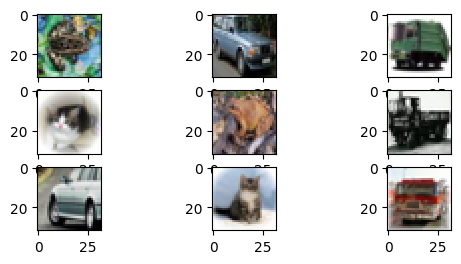

In [ ]:
# CNN de línea base.
import matplotlib.pyplot as plt
# create a grid of 3x3 images
for i in range(200, 209):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
# show the plot
plt.show()

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# Compile model
# Compilar modelo
model = AlexNet()
epochs = 50
lrate = 0.01
decay = lrate/epochs

sgd = SGD(learning_rate=lrate, momentum=0.9, weight_decay=decay, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.3129 - loss: 1.8245 - val_accuracy: 0.4474 - val_loss: 1.4878
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5092 - loss: 1.3619 - val_accuracy: 0.4839 - val_loss: 1.5349
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5707 - loss: 1.2069 - val_accuracy: 0.5385 - val_loss: 1.3059
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6202 - loss: 1.0808 - val_accuracy: 0.5472 - val_loss: 1.2942
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6517 - loss: 0.9903 - val_accuracy: 0.5491 - val_loss: 1.3030
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6915 - loss: 0.8861 - val_accuracy: 0.5871 - val_loss: 1.2138
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7218 - loss: 0.7975 - val_accuracy: 0.6197 - val_loss: 1.1104
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7458 - loss: 0.7190 - val_

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %0.2f%%" % (scores[1]*100))

Accuracy: 65.33%
